# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [73]:
import sqlite3
from IPython.display import Image

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [3]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)


Again, we will use **`%%sql`** magic for our queries

In [4]:
%load_ext sql
%sql sqlite:///wine.db

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

In [48]:
%%sql
    DROP TABLE if exists Wine;
    CREATE table Wine AS
    SELECT DISTINCT NV, CRU, DEGRE, MILL
    FROM Master1
    where nv is not null;
    
    drop table if exists Producer;
    create table Producer as
    select DISTINCT NP, NOM, PRENOM, REGION
    from Master1
    where np is not null;
    
    drop table if exists Product;
    create table Product as
    select DISTINCT NP, NV, QTE
    from Master1
    where np is not null or nv is not null;
    
    drop table if exists Buyer;
    CREATE table Buyer AS
    SELECT DISTINCT NB, NOM, PRENOM, TYPE
    FROM Master2
    where nb is not null;
    
    drop table if exists BuyedWine;
    create table BuyedWine as
    select DISTINCT NV, CRU, DEGRE, MILL
    from Master2
    where nv is not null;
    
    drop table if exists Sale;
    create table Sale as
    select DISTINCT NB, NV, DATES, LIEU, QTE
    from Master2
    where nb is not null or nv is not null or dates is not null or lieu is not null;
    
    drop table if exists Region;
    create table Region as
    select DISTINCT ieu, region
    from Master2
    where lieu is not null;

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
(sqlite3.OperationalError) no such column: ieu
[SQL: create table Region as
    select DISTINCT ieu, region
    from Master2
    where lieu is not null;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [6]:
%%sql DROP VIEW IF EXISTS bons_buveurs;
    CREATE VIEW bons_buveurs AS 
    SELECT DISTINCT NB, NOM, PRENOM, TYPE 
    FROM Buyer 
    WHERE TYPE in ('gros', 'moyen');

 * sqlite:///wine.db
Done.
Done.


[]

In [7]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [49]:
%%sql DROP VIEW IF EXISTS buveurs_asec;
    CREATE VIEW buveurs_asec AS 
    SELECT b.NB, b.NOM, b.PRENOM, b.TYPE 
    FROM Buyer b
    EXCEPT 
    SELECT b.NB, NOM, PRENOM, TYPE 
    FROM Sale s, Buyer b 
    WHERE s.NB = b.NB and QTE is not NULL;

 * sqlite:///wine.db
Done.
Done.


[]

In [50]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [51]:
%%sql DROP VIEW IF EXISTS buveurs_achats;
    CREATE VIEW buveurs_achats AS 
    SELECT DISTINCT b.NB, NOM, PRENOM, TYPE 
    FROM Buyer b, Sale
    WHERE Sale.NB = b.NB and QTE is not NULL;

 * sqlite:///wine.db
Done.
Done.


[]

In [52]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [53]:
%%sql DROP VIEW IF EXISTS q83pl;
    CREATE VIEW q83pl AS 
    SELECT s.LIEU, w.CRU, SUM(s.QTE) as QTE_BUE 
    FROM Wine w, Sale s 
    WHERE s.DATES LIKE '%1983%' and w.NV = s.NV 
    GROUP BY w.CRU 
    ORDER BY s.LIEU, w.CRU;

 * sqlite:///wine.db
Done.
Done.


[]

In [54]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,270
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Saint Amour,80


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

In [55]:
%%sql DROP VIEW IF EXISTS q83pl;
    CREATE VIEW q83pl AS 
    SELECT LIEU, CRU, QTE_BUE FROM 
        (SELECT s.LIEU, w.CRU, SUM(s.QTE) as QTE_BUE 
        FROM Wine w, Sale s 
        WHERE s.DATES LIKE '%1983%' and w.NV = s.NV 
        GROUP BY w.CRU 
        ORDER BY s.LIEU, w.CRU) 
    ORDER BY QTE_BUE;
    
    SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.
Done.
Done.


LIEU,CRU,QTE_BUE
PARIS,Coteaux du Tricastin,1
RENNES,Mercurey,1
LYON,Julienas,2
CAEN,Seyssel,3
PARIS,Pouilly Vinzelles,3
PARIS,Beaujolais Primeur,4
LILLE,Pommard,5
ROCQUENCOURT,Saint Amour,80
LYON,Beaujolais Villages,270


___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [56]:
%%sql DROP TABLE IF EXISTS RBB;
    CREATE TABLE RBB AS 
    SELECT * FROM bons_buveurs;

 * sqlite:///wine.db
Done.
Done.


[]

In [57]:
# Test
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
27,Dumas,Alexandre,gros
32,Eluard,Paul,moyen
35,Fromentin,Eugene,gros
39,Montesquieu,None,gros
42,Goethe,Johann Wolfgang von,moyen
43,Musset,Alfred de,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [58]:
%%sql SELECT s.NB, NOM, PRENOM, TYPE, SUM(QTE) as TOTAL 
    FROM Sale s, Buyer b 
    WHERE s.NB = b.NB and TYPE <> 'gros' and s.QTE is not NULL 
    GROUP BY b.NB 
    HAVING TOTAL > 100 ;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,TOTAL
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [60]:
%%sql UPDATE Buyer 
    SET TYPE = 'gros' 
    WHERE NB in (2, 5, 9, 44);

 * sqlite:///wine.db
4 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

In [64]:
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
27,Dumas,Alexandre,gros
32,Eluard,Paul,moyen
35,Fromentin,Eugene,gros
39,Montesquieu,None,gros
42,Goethe,Johann Wolfgang von,moyen
43,Musset,Alfred de,gros


In [65]:
%sql SELECT * FROM bons_buveurs;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
27,Dumas,Alexandre,gros
32,Eluard,Paul,moyen
35,Fromentin,Eugene,gros
39,Montesquieu,None,gros
42,Goethe,Johann Wolfgang von,moyen
43,Musset,Alfred de,gros


#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [66]:
%%sql DROP TABLE IF EXISTS RBA;
    CREATE TABLE RBA AS SELECT * FROM buveurs_asec ORDER BY NB;

 * sqlite:///wine.db
Done.
Done.


[]

In [67]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [68]:
%sql INSERT INTO RBA (NB, NOM, PRENOM, TYPE) VALUES (101, 'Lukin', 'Konstantin', 'gros');

 * sqlite:///wine.db
1 rows affected.


[]

In [69]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

In [71]:
%sql SELECT * FROM RBA;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [72]:
%sql SELECT * FROM buveurs_asec;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

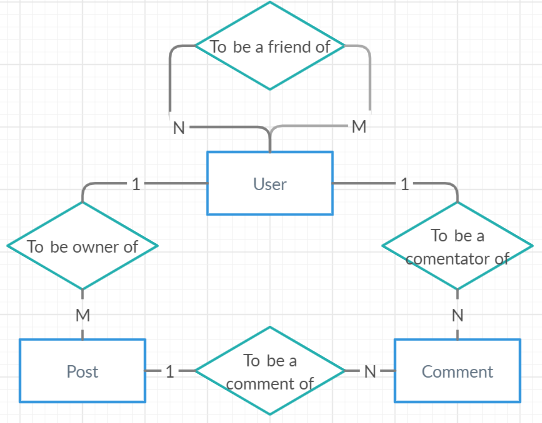

In [79]:
Image("erm.png")

#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.